<a href="https://colab.research.google.com/github/afc523/Portfolio/blob/main/Project_Soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sea
plt.style.use('ggplot')

In [3]:
#File upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spi_matches.csv to spi_matches.csv
User uploaded file "spi_matches.csv" with length 9689769 bytes


In [4]:
df = pd.read_csv('spi_matches.csv')
df.shape

(68913, 23)

In [5]:
df.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

Header | Definition
---|---------
`season` | The season during which the match was played
`date` | The date of the match (YYYY-MM-DD)
`league_id` | A unique identifier for the league this match was played in
`league` | The name of the league this match was played in
`team1` | The home team's name
`team2` | The away team's name
`spi1` | The home team's overall SPI rating before the match
`spi2` | The away team's overall SPI rating before the match
`prob1` | The probability of the home team winning the match
`prob2` | The probability of the away team winning the match
`probtie` | The probability of match ending in a draw (if applicable)
`proj_score1` | The number of goals we expected the home team to score
`proj_score2` | The number of goals we expected the away team to score
`importance1` | The importance of the match for the home team (0-100)
`importance2` | The importance of the match for the away team (0-100)
`score1` | The number of goals scored by the home team
`score2` | The number of goals scored by the away team
`xg1` | The number of expected goals created by the home team
`xg2` | The number of expected goals created by the away team
`nsxg1` | The number of non-shot expected goals created by the home team
`nsxg2` | The number of non-shot expected goals created by the away team
`adj_score1` | The number of goals scored by the home team, adjusted for game state
`adj_score2` | The number of goals scored by the home team, adjusted for game state

In [7]:
df.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

season                  int64
date           datetime64[ns]
league_id               int64
league                 object
team1                  object
team2                  object
spi1                  float64
spi2                  float64
prob1                 float64
prob2                 float64
probtie               float64
proj_score1           float64
proj_score2           float64
importance1           float64
importance2           float64
score1                float64
score2                float64
xg1                   float64
xg2                   float64
nsxg1                 float64
nsxg2                 float64
adj_score1            float64
adj_score2            float64
dtype: object

In [10]:
df.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,68913.000000,68913.000000,68913.000000,68913.000000,68913.000000,68913.000000,68913.000000,68913.000000,68913.000000,61122.000000,61122.000000,66909.000000,66909.000000,36193.000000,36193.000000,36193.000000,36193.000000,36193.000000,36193.000000
mean,2019.644262,2248.058944,43.386865,43.344475,0.441812,0.304949,0.253239,1.494190,1.175031,31.660207,31.078451,1.498229,1.183742,1.499693,1.187575,1.388203,1.136089,1.515936,1.193284
std,1.854195,1087.705330,18.988991,18.995900,0.156164,0.142752,0.046705,0.418281,0.412866,26.349662,26.114623,1.272452,1.138514,0.835067,0.745407,0.648301,0.578436,1.238626,1.123124
min,2016.000000,1818.000000,3.060000,3.120000,0.022500,0.003200,0.000000,0.210000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,1854.000000,29.830000,29.840000,0.341600,0.210000,0.235200,1.220000,0.910000,11.100000,10.700000,1.000000,0.000000,0.880000,0.630000,0.930000,0.730000,1.050000,0.000000
50%,2020.000000,1879.000000,41.390000,41.290000,0.432700,0.289800,0.260500,1.440000,1.120000,26.300000,25.500000,1.000000,1.000000,1.370000,1.050000,1.300000,1.050000,1.050000,1.050000
75%,2021.000000,2160.000000,56.210000,56.110000,0.533000,0.381500,0.281200,1.700000,1.390000,45.900000,45.300000,2.000000,2.000000,1.970000,1.590000,1.730000,1.440000,2.100000,2.100000
max,2023.000000,10281.000000,96.570000,96.780000,0.977500,0.899500,0.453700,4.900000,4.130000,100.000000,100.000000,11.000000,13.000000,7.070000,8.270000,6.890000,7.170000,9.150000,11.050000


In [11]:
df = df[['season', 'date', 'league_id', 'league', 'team1', 'team2',
    # 'spi1', 'spi2', 'prob1', 'prob2', 'probtie',
         'proj_score1', 'proj_score2',
     #  'importance1', 'importance2',
    'score1', 'score2',
    'xg1', 'xg2', 'nsxg1','nsxg2',
         # 'adj_score1', 'adj_score2'
    ]].copy()

In [12]:
df.shape

(68913, 14)

In [13]:
df.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2',
       'proj_score1', 'proj_score2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2'],
      dtype='object')

In [14]:
# if there is a no value
df.isna()

,season,date,league_id,league,team1,team2,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2
0,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68908,False,False,False,False,False,False,False,False,True,True,True,True,True,True
68909,False,False,False,False,False,False,False,False,True,True,True,True,True,True
68910,False,False,False,False,False,False,False,False,True,True,True,True,True,True
68911,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [15]:
# Number of missing values in each column
df.isna().sum()

season             0
date               0
league_id          0
league             0
team1              0
team2              0
proj_score1        0
proj_score2        0
score1          2004
score2          2004
xg1            32720
xg2            32720
nsxg1          32720
nsxg2          32720
dtype: int64

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68908    False
68909    False
68910    False
68911    False
68912    False
Length: 68913, dtype: bool

In [17]:
df.loc[df.duplicated()]

,season,date,league_id,league,team1,team2,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2


In [18]:
df.duplicated(subset=['season','date','league_id','team1','team2','score1','score2']).sum()

0

In [19]:
df

,season,date,league_id,league,team1,team2,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,1.39,1.05,2.0,0.0,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,1.27,1.28,2.0,0.0,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,1.53,1.03,1.0,1.0,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,1.27,0.94,0.0,0.0,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,1.45,1.24,1.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68908,2023,2023-12-03,2105,Brasileiro Série A,Cruzeiro,Palmeiras,1.18,1.62,NaN,NaN,NaN,NaN,NaN,NaN
68909,2023,2023-12-03,2105,Brasileiro Série A,São Paulo,Flamengo,1.56,1.48,NaN,NaN,NaN,NaN,NaN,NaN
68910,2023,2023-12-03,2105,Brasileiro Série A,Santos,Fortaleza,1.30,0.96,NaN,NaN,NaN,NaN,NaN,NaN
68911,2023,2023-12-03,2105,Brasileiro Série A,Internacional,Botafogo,1.38,1.10,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df['league'].value_counts()

English League Championship                 3342
Major League Soccer                         2998
United Soccer League                        2888
Spanish Segunda Division                    2807
English League Two                          2673
Brasileiro Série A                          2660
Barclays Premier League                     2660
Spanish Primera Division                    2660
Italy Serie A                               2660
French Ligue 1                              2660
English League One                          2629
Italy Serie B                               2382
French Ligue 2                              2280
German Bundesliga                           2142
Turkish Turkcell Super Lig                  2060
Argentina Primera Division                  2060
Dutch Eredivisie                            1836
Portuguese Liga                             1836
German 2. Bundesliga                        1836
Japanese J League                           1751
Norwegian Tippeligae

In [35]:
df.groupby('league')['score1'].agg(['count','sum', 'mean'])

,count,sum,mean
league,,,
Argentina Primera Division,1959,2502.0,1.277182
Australian A-League,775,1258.0,1.623226
Austrian T-Mobile Bundesliga,1153,1819.0,1.577624
Barclays Premier League,2660,4071.0,1.530451
Belgian Jupiler League,1492,2383.0,1.597185
Brasileiro Série A,2380,3279.0,1.377731
Chinese Super League,369,672.0,1.821138
Danish SAS-Ligaen,1064,1603.0,1.506579
Dutch Eredivisie,1762,3078.0,1.746879


In [53]:
# Home team scores sorted based on mean
df.groupby('team1')['score1'] \
.agg(['count','sum', 'mean']) \
.sort_values('mean', ascending=False)

,count,sum,mean
team1,,,
Bayern Munich,153,476.0,3.111111
Ajax,122,357.0,2.926230
Chelsea FC Women,63,180.0,2.857143
Manchester City Women,63,178.0,2.825397
Manchester City,172,481.0,2.796512
...,...,...,...
Vorskla,3,1.0,0.333333
Zlín,3,1.0,0.333333
Vardar,3,1.0,0.333333


In [54]:
# Away team scores sorted based on mean
df.groupby('team2')['score2'] \
.agg(['count','sum', 'mean']) \
.sort_values('mean', ascending=False)

,count,sum,mean
team2,,,
Guangzhou Evergrande,25,68.0,2.720000
Chelsea FC Women,62,163.0,2.629032
Arsenal Women,62,162.0,2.612903
Ajax,121,293.0,2.421488
Manchester City Women,61,147.0,2.409836
...,...,...,...
Paraná,19,5.0,0.263158
Energiya Khabarovsk,15,3.0,0.200000
CSKA Sofia,6,1.0,0.166667


In [55]:
df['season'].value_counts()

2021    11617
2022    11562
2019    11246
2018    11224
2020    10303
2017     8243
2023     2577
2016     2141
Name: season, dtype: int64

Text(0, 0.5, 'Count')

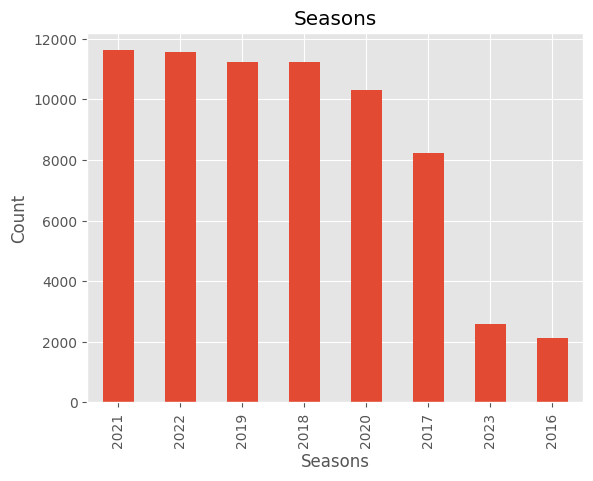

In [56]:
ax = df['season'].value_counts() \
.plot(kind='bar', title='Seasons')
ax.set_xlabel('Seasons')
ax.set_ylabel('Count')

<Axes: title={'center': 'Away Team Scores'}, ylabel='Frequency'>

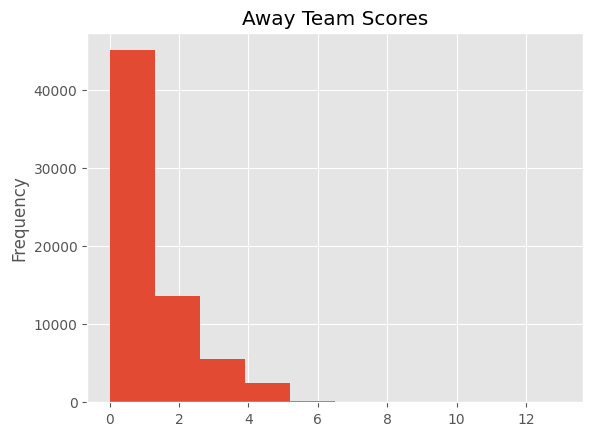

In [57]:
df['score2'].plot(kind='hist', title='Away Team Scores')

Text(0.5, 0, 'Goals Scored by Home Team')

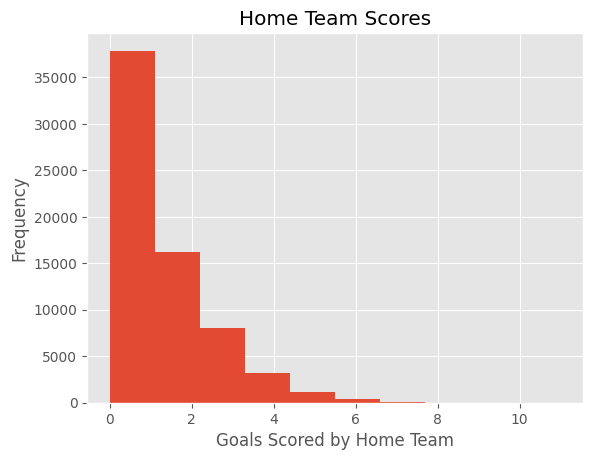

In [58]:
ax = df['score1'].plot(kind='hist', title='Home Team Scores')
ax.set_xlabel('Goals Scored by Home Team')

Text(0.5, 0, 'Goals Scored by Home Team')

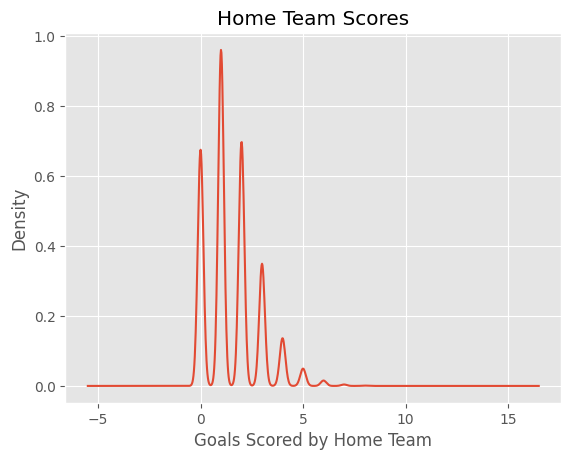

In [59]:
ax = df['score1'].plot(kind='kde', title='Home Team Scores')
ax.set_xlabel('Goals Scored by Home Team')

Text(0.5, 0, 'Goals Scored by Away Team')

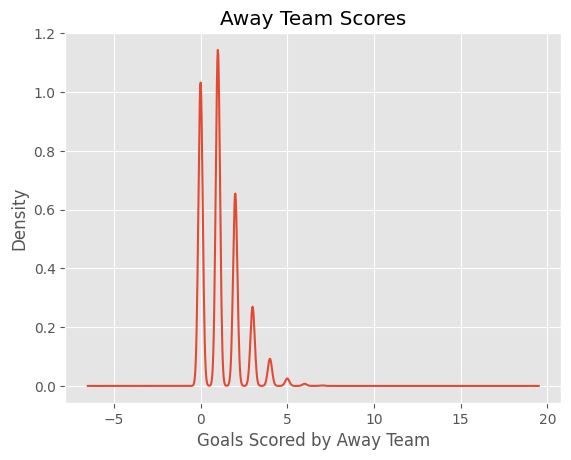

In [60]:
ax = df['score2'].plot(kind='kde', title='Away Team Scores')
ax.set_xlabel('Goals Scored by Away Team')

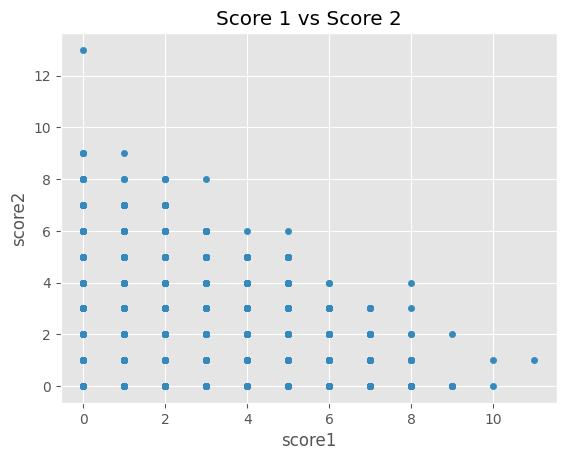

In [61]:
df.plot(kind='scatter', x='score1', y='score2',
title='Score 1 vs Score 2')
plt.show()

<Axes: xlabel='score1', ylabel='score2'>

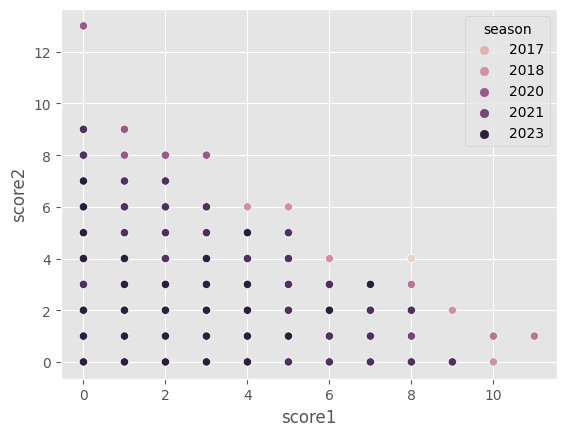

In [62]:
sea.scatterplot(x='score1', y='score2', hue='season', data=df)

<Axes: xlabel='score1', ylabel='proj_score1'>

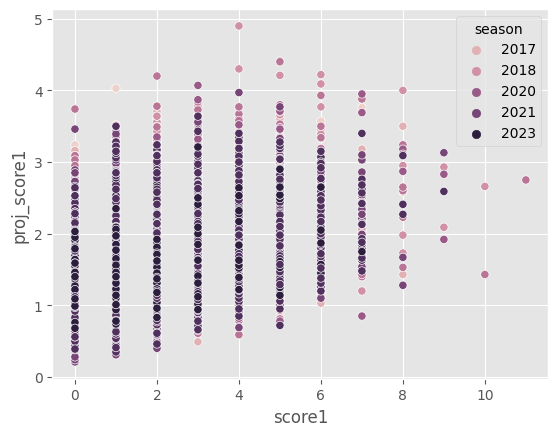

In [63]:
sea.scatterplot(x='score1', y='proj_score1', hue='season', data=df)

<Axes: xlabel='score1', ylabel='xg1'>

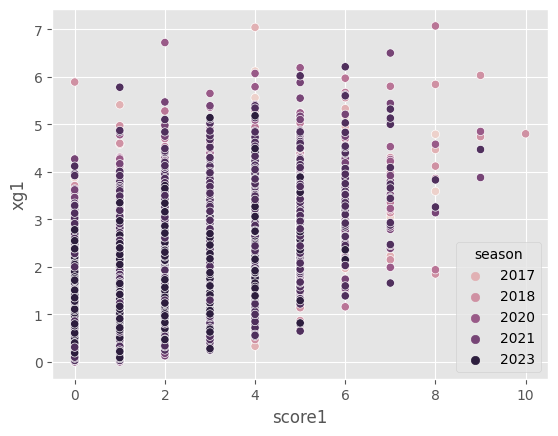

In [64]:
sea.scatterplot(x='score1', y='xg1', hue='season', data=df)

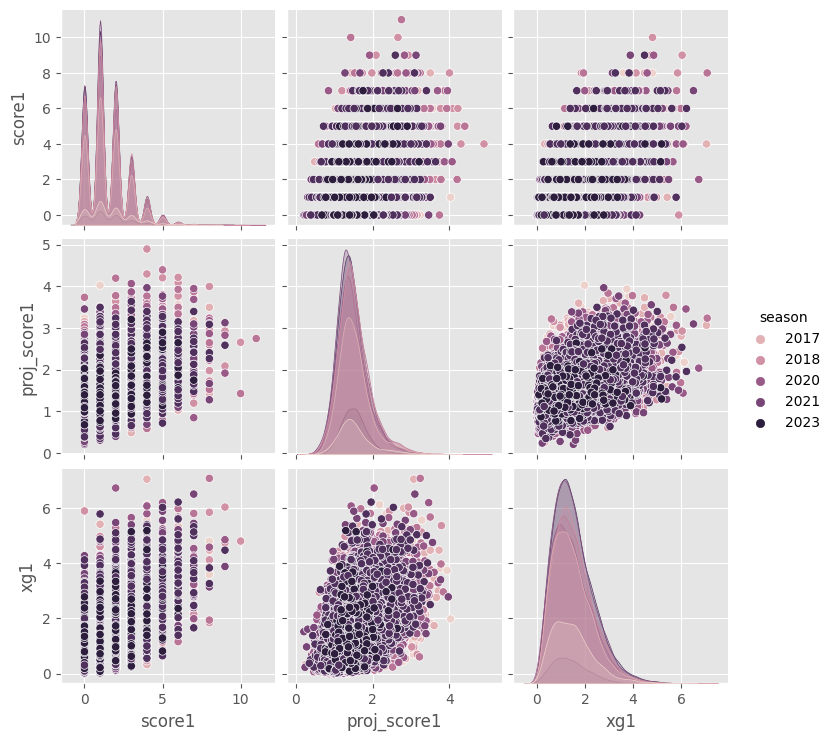

In [65]:
sea.pairplot(df, vars=['score1','proj_score1','xg1'],
             hue='season')
plt.show()

In [66]:
# Correlation and drop any no values
df_corr = df[['score1','xg1','proj_score1','nsxg1','score2','xg2','proj_score2','nsxg2']].dropna() \
.corr()
df_corr

,score1,xg1,proj_score1,nsxg1,score2,xg2,proj_score2,nsxg2
score1,1.000000,0.557709,0.341241,0.219724,-0.054056,-0.086519,-0.228346,-0.068563
xg1,0.557709,1.000000,0.431447,0.562765,-0.070798,-0.150779,-0.288912,-0.204024
proj_score1,0.341241,0.431447,1.000000,0.511872,-0.185954,-0.250784,-0.600181,-0.315805
nsxg1,0.219724,0.562765,0.511872,1.000000,-0.028822,-0.179061,-0.342585,-0.316862
score2,-0.054056,-0.070798,-0.185954,-0.028822,1.000000,0.574548,0.305543,0.242485
xg2,-0.086519,-0.150779,-0.250784,-0.179061,0.574548,1.000000,0.414186,0.575035
proj_score2,-0.228346,-0.288912,-0.600181,-0.342585,0.305543,0.414186,1.000000,0.507240
nsxg2,-0.068563,-0.204024,-0.315805,-0.316862,0.242485,0.575035,0.507240,1.000000


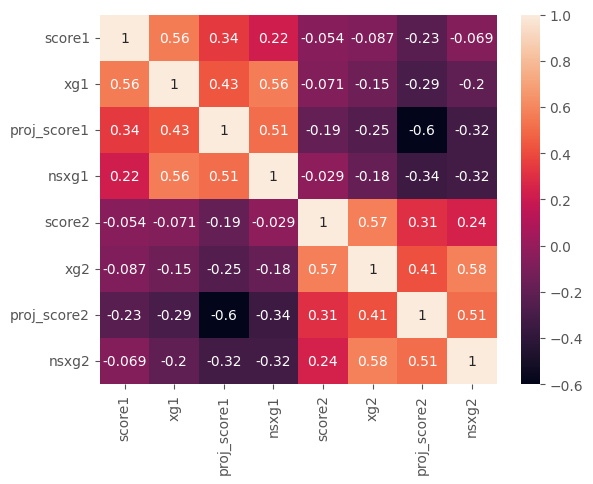

In [67]:
sea.heatmap(df_corr, annot=True)
plt.show()

In [84]:
# Which league has the highest average goal?
#Home team scores
df.groupby('league')['score1'] \
.agg(['count','sum', 'mean']) \
.sort_values('mean', ascending=False)

,count,sum,mean
league,,,
Chinese Super League,369,672.0,1.821138
Major League Soccer,2752,4825.0,1.753270
Norwegian Tippeligaen,1523,2665.0,1.749836
Dutch Eredivisie,1762,3078.0,1.746879
German Bundesliga,2142,3673.0,1.714753
United Soccer League,2640,4433.0,1.679167
UEFA Champions League,869,1456.0,1.675489
Swiss Raiffeisen Super League,1080,1771.0,1.639815
Australian A-League,775,1258.0,1.623226


<Axes: title={'center': 'Home Team Goals per League'}, ylabel='team1'>

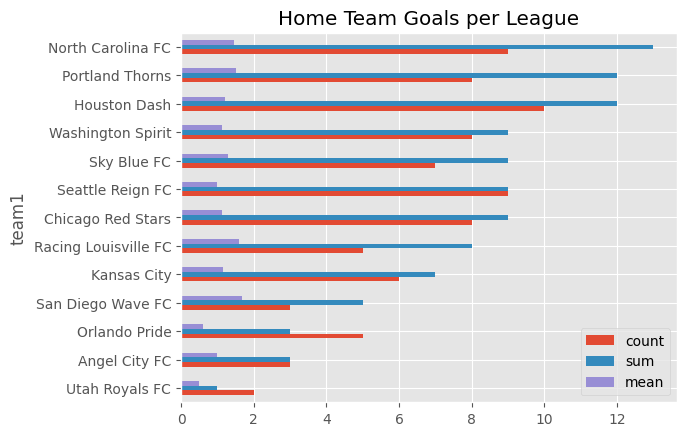

In [76]:
#For a certain league home taem scores sorted based on mean
df.query('league == "NWSL Challenge Cup"') \
.groupby('team1')['score1'] \
.agg(['count','sum','mean']) \
.query('count >= 0') \
.sort_values('sum') \
.plot(kind='barh', title='Home Team Goals per League')

<Axes: title={'center': 'Home Team Goals per Team in Portuguese Liga'}, ylabel='team1'>

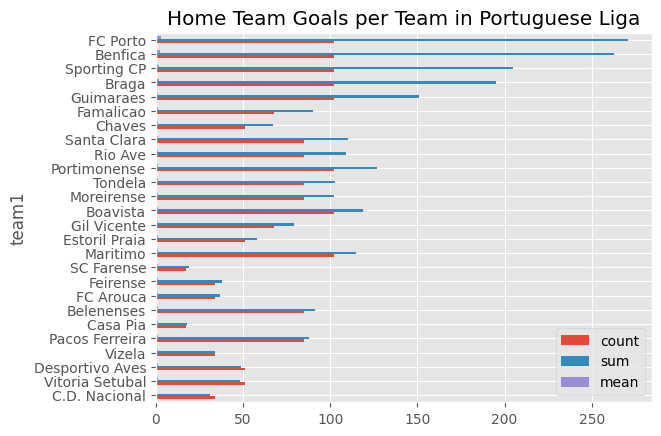

In [81]:
df.query('league == "Portuguese Liga"') \
.groupby('team1')['score1'] \
.agg(['count','sum','mean']) \
.query('count >= 0') \
.sort_values('mean') \
.plot(kind='barh', title='Home Team Goals per Team in Portuguese Liga')

<Axes: title={'center': 'Away Team Goals per Team in Portuguese Liga'}, ylabel='team2'>

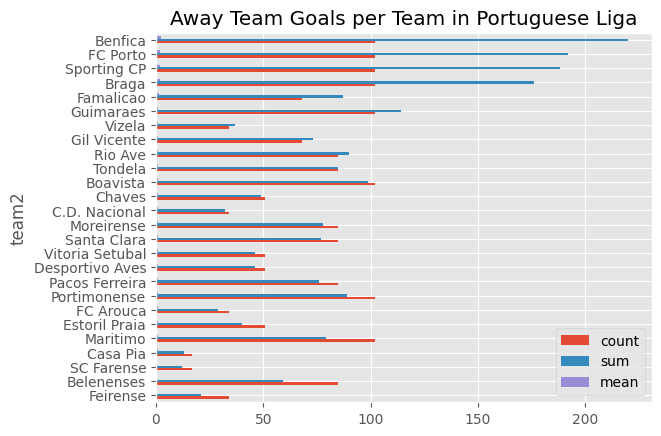

In [96]:
df.query('league == "Portuguese Liga"') \
.groupby('team2')['score2'] \
.agg(['count','sum','mean']) \
.query('count >= 0') \
.sort_values('mean') \
.plot(kind='barh', title='Away Team Goals per Team in Portuguese Liga')